In [1]:
#|default_exp app

In [2]:
#|export

import pickle  # or import joblib
from fastai.vision.all import *
import gradio as gr

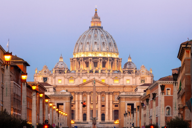

In [3]:
im = PILImage.create('media/test.jpg')
im.thumbnail((192, 192))
im

In [4]:
#|export

learn = load_learner('models/archclassifier_v2.pkl')

/home/adil/miniconda3/envs/fastai/lib/python3.10/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [5]:
learn.predict(im)

('Baroque architecture',
 tensor(6),
 tensor([2.4461e-04, 1.5687e-05, 5.9341e-06, 6.0816e-05, 3.3674e-03, 2.3624e-05,
         6.7530e-01, 2.0109e-05, 8.4749e-04, 2.8230e-01, 3.4841e-04, 6.4898e-03,
         1.5786e-05, 2.2593e-04, 5.6275e-04, 6.3297e-05, 1.0993e-03, 1.1476e-04,
         4.2441e-05, 2.7309e-02, 3.6776e-05, 3.6548e-06, 1.2962e-03, 1.7731e-04,
         2.7370e-05]))

In [6]:
# %time
pred_class, pred_idx, probs = learn.predict(im)
print(f"Prediction: {pred_class}, Confidence: {probs[pred_idx]*100:.1f}%")

Prediction: Baroque architecture, Confidence: 67.5%


In [7]:
#|export

def classify_image(img):
    img = PILImage.create(img)
    pred_class, pred_idx, probs = learn.predict(img)
    
    # Corrected: Create dict mapping class names to float probabilities
    return dict(zip(learn.dls.vocab, map(float, probs)))

In [8]:
classify_image(im)

{'Achaemenid architecture': 0.00024461219436489046,
 'American Foursquare architecture': 1.568681727803778e-05,
 'American craftsman style': 5.9340904954297e-06,
 'Ancient Egyptian architecture': 6.081563697080128e-05,
 'Art Deco architecture': 0.0033674119040369987,
 'Art Nouveau architecture': 2.3623875677003525e-05,
 'Baroque architecture': 0.6753000020980835,
 'Bauhaus architecture': 2.0109067918383516e-05,
 'Beaux-Arts architecture': 0.0008474938222207129,
 'Byzantine architecture': 0.2823016345500946,
 'Chicago school architecture': 0.00034841062733903527,
 'Colonial architecture': 0.006489829160273075,
 'Deconstructivism': 1.578625597176142e-05,
 'Edwardian architecture': 0.0002259324974147603,
 'Georgian architecture': 0.0005627470090985298,
 'Gothic architecture': 6.329666211968288e-05,
 'Greek Revival architecture': 0.001099253655411303,
 'International style': 0.00011476135114207864,
 'Novelty architecture': 4.244134106556885e-05,
 'Palladian architecture': 0.027308978140354

In [9]:
#|export
# examples = ['sunny.jpg','rainy.jpg']

intf = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(),
    outputs=gr.Label(num_top_classes=3),  # show top 3 predictions visually
    # examples=examples,
    title="Arch Style Classifier 🌦️",
    description="Upload or choose an image to classify the Arch Style."
)

intf.launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [10]:
from nbdev.export import nb_export
nb_export('load.ipynb')  # converts notebook to .py file